In [1]:
""" Preprocesamiento"""
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

"""Visualización de los datos"""
import matplotlib.pyplot as plt
import seaborn as sns

"""Modelación de los datos"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

"""Evaluación del modelo"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

"""Visualizar todas las columnas y reglones"""
pd.set_option('display.max_columns', 220)
pd.set_option('display.max_rows', 90)

"""Ignorar Avisos"""
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

<h1><center>HOUSES PRICES - ADVANCED REGRESSION SUBMISSION</center></h1>

Cargar los datos
---
Para evitar _data leakage_, se han separado los datos de prueba y los datos de testing.

In [2]:
houses = pd.read_csv("Houses_train.csv");houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Información General del Dataset
---

### Valores Nulos o NaN

Todas estás variables contienen NaNs o valores nulos.

In [3]:
print("Dimensiones:",houses.shape)
houses.isna().sum().where(lambda x : x >0).dropna()

Dimensiones: (1460, 81)


LotFrontage      259.0
Alley           1369.0
MasVnrType         8.0
MasVnrArea         8.0
BsmtQual          37.0
BsmtCond          37.0
BsmtExposure      38.0
BsmtFinType1      37.0
BsmtFinType2      38.0
Electrical         1.0
FireplaceQu      690.0
GarageType        81.0
GarageYrBlt       81.0
GarageFinish      81.0
GarageQual        81.0
GarageCond        81.0
PoolQC          1453.0
Fence           1179.0
MiscFeature     1406.0
dtype: float64

### Estadísticas resumidas

In [4]:
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Descripción de las variables
Para consultar la descripción de cada variable, ir al siguiente [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt).<br>
Se muestra solo la descripción de las variables que contienen NaNs o valores nulos para ver cómo están estructurados los datos y así poder tomar una decisión.<br><br>

__LotFrontage__: Linear feet of street connected to property<br><br>
__Alley__: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
__MasVnrType__: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
__MasVnrArea__: Masonry veneer area in square feet<br><br>
__BsmtQual__: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
__BsmtCond__: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
__BsmtExposure__: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
__BsmtFinType1__: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

__BsmtFinType2__: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
__Electrical__: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
__FireplaceQu__: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
__GarageType__: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
__GarageYrBlt__: Year garage was built<br><br>
		
__GarageFinish__: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
__GarageQual__: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
__GarageCond__: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
__PoolQC__: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
__Fence__: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
__MiscFeature__: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None


### Borrar columnas innecesarias (filtro 1)
Se borrar las siguientes columnas por las siguientes concideraciones: 
1. __Id__ : El índice no debería nunca ser considerado como una variable a tratar en algún modelo de predicción.
2. __LowQualFinSF__ : Solo 23 datos son diferentes a 0 (Qué representan la ausencia de la propiedad). Por lo tanto, esta columa tiene ceros y puros _outliers_ pudiendo arruinar el análisis.
3. __3SsnPorch__ : Al menos el 75% de los datos corresponden a una misma clasificacón (0, que representa la ausencia de la propiedad). Los demás valores son considerados como _outliers_.
4. __PoolArea__ : Al menos el 75% de los datos corresponden a una misma clasificacón (0, que representa la ausencia de la propiedad). Los demás valores son considerados como _outliers_. Esta variable podría causar multicolinealidad con su par __PoolQC__
5. __MiscVar__ : Al menos el 75% de los datos corresponden a una misma clasificacón (0, que representa la ausencia de la propiedad). Los demás valores son considerados como _outliers_.

Cuenta de valores para LowQualFinSF:
 0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64


Text(0.5, 1.0, 'BOXPLOT PARA LOWQUALFINSF')

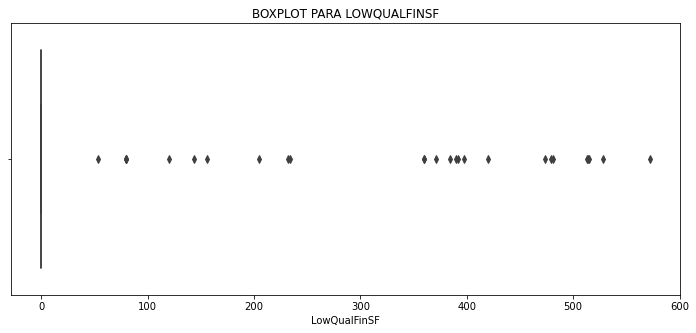

In [5]:
print("Cuenta de valores para LowQualFinSF:\n",houses.LowQualFinSF.value_counts())
fig, ax = plt.subplots(figsize = [12,5])
sns.boxplot(houses.LowQualFinSF)
plt.title("BOXPLOT PARA LOWQUALFINSF")

Cuenta de valores para 3SsnPorch:
 0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64


Text(0.5, 1.0, 'BOXPLOT PARA 3SsnPorch')

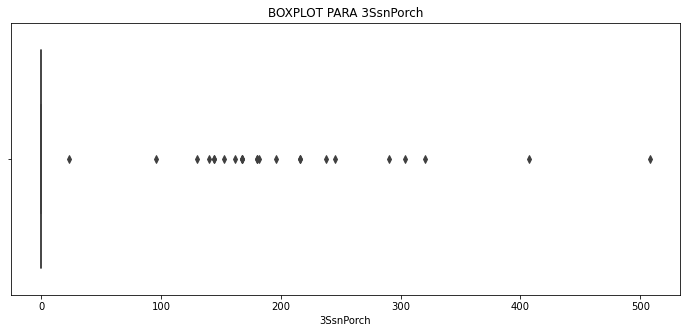

In [6]:
print("Cuenta de valores para 3SsnPorch:\n",houses["3SsnPorch"].value_counts())
fig, ax = plt.subplots(figsize = [12,5])
sns.boxplot(houses["3SsnPorch"])
plt.title("BOXPLOT PARA 3SsnPorch")

Cuenta de valores para PoolArea:
 0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


Text(0.5, 1.0, 'BOXPLOT PARA PoolArea')

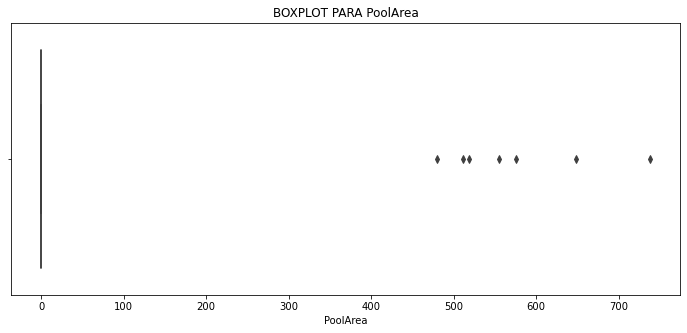

In [7]:
print("Cuenta de valores para PoolArea:\n",houses["PoolArea"].value_counts())
fig, ax = plt.subplots(figsize = [12,5])
sns.boxplot(houses["PoolArea"])
plt.title("BOXPLOT PARA PoolArea")

Cuenta de valores para PoolQC:
 Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


Text(0.5, 1.0, 'BOXPLOT PARA PoolQC')

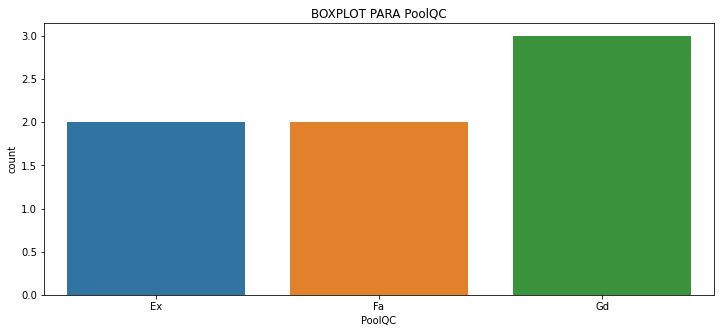

In [8]:
print("Cuenta de valores para PoolQC:\n",houses["PoolQC"].value_counts())
fig, ax = plt.subplots(figsize = [12,5])
sns.countplot(houses["PoolQC"])
plt.title("BOXPLOT PARA PoolQC")

Cuenta de valores para MiscVal:
 0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64


Text(0.5, 1.0, 'BOXPLOT PARA MiscVal')

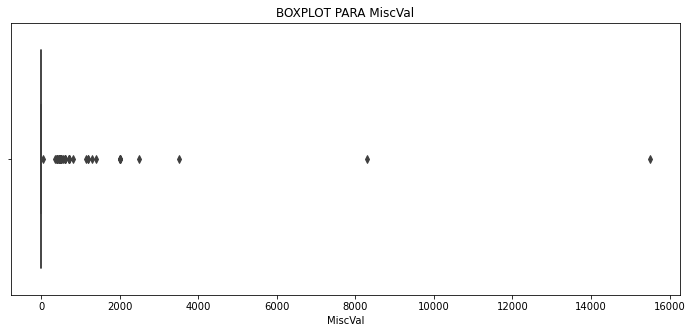

In [9]:
print("Cuenta de valores para MiscVal:\n",houses["MiscVal"].value_counts())
fig, ax = plt.subplots(figsize = [12,5])
sns.boxplot(houses["MiscVal"])
plt.title("BOXPLOT PARA MiscVal")

In [10]:
houses.drop(columns = ["Id","LowQualFinSF","3SsnPorch", "PoolArea","MiscVal","PoolQC"], inplace = True)

### Análisis Columnas (NaN o Null)

#### LotFrontage
Muchos valores extremos. Tomando en cuenta que los valores son entero, decidiré sustituir los NAN por la medio de la distribución.

In [11]:
houses.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

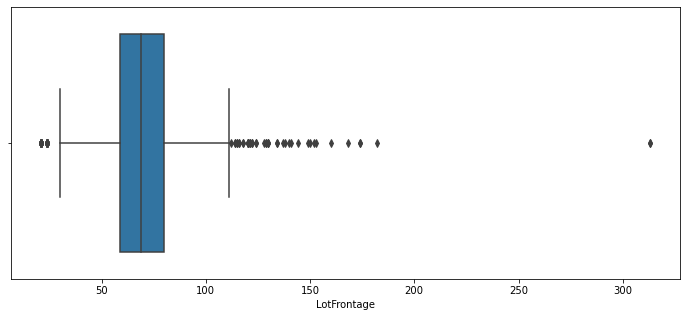

In [12]:
fig, ax = plt.subplots(figsize = [12,5])
sns.boxplot(houses.LotFrontage)

In [13]:
houses.LotFrontage.fillna(houses.LotFrontage.median(),inplace = True)

#### MasVnrType

In [14]:
houses.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

Desde que solo son 8 valores nulos, he decidido sustituir los valores Nan por la moda. Esto es, "None".

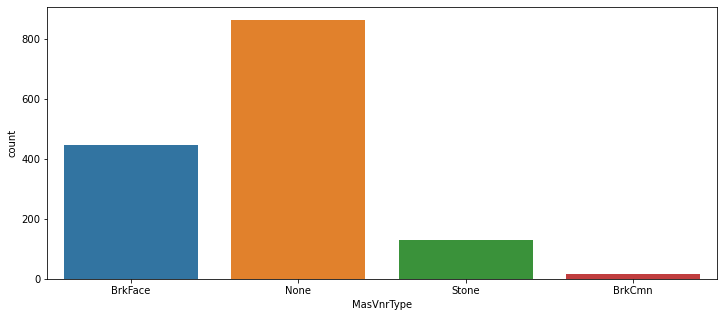

In [15]:
fig,aux = plt.subplots(figsize = [12,5])
sns.countplot(houses.MasVnrType)

In [16]:
houses.MasVnrType.fillna("None", inplace = True)

#### MasVnrArea

Como son solo 8 valores Nan y dado que la distribución está muy sesgada positivamente, sustituire los valores por la mediana de la distribución.

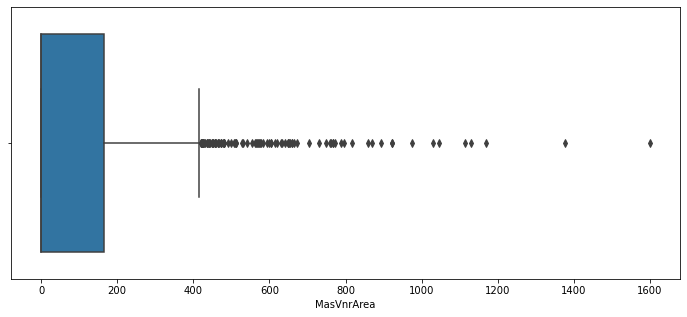

In [17]:
fig,ax = plt.subplots(figsize = [12,5])
sns.boxplot(houses.MasVnrArea)

In [18]:
houses.MasVnrArea.fillna(houses.MasVnrArea.median(),inplace = True)

#### BsmtCond
Por practicidad y por ser solamente 37 registros Nan, cambiaré por la moda estos valores.

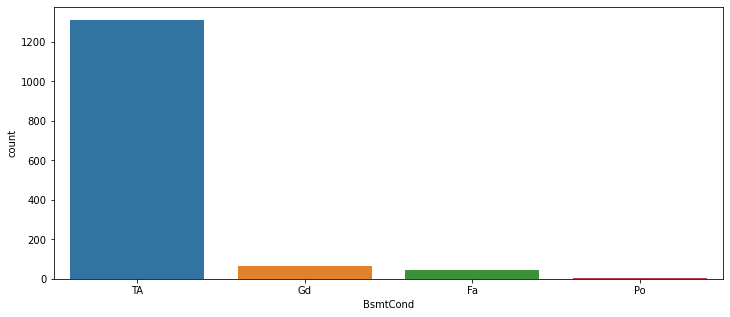

In [19]:
fig,ax = plt.subplots(figsize = [12,5])
sns.countplot(houses.BsmtCond)

In [20]:
houses.BsmtCond.fillna("TA", inplace = True)

#### Electrical
1 solo valor Nan; lo reemplazaré por la moda.

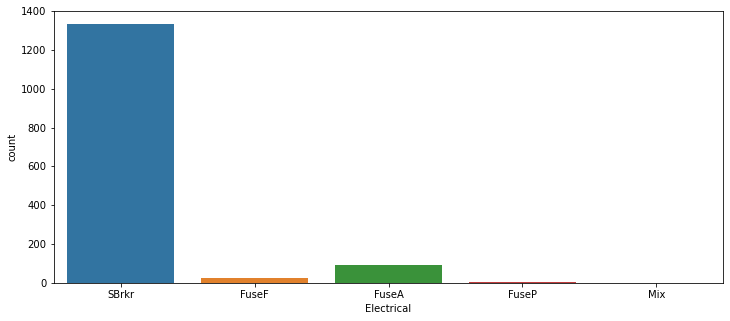

In [21]:
fig,ax = plt.subplots(figsize = [12,5])
sns.countplot(houses.Electrical)

In [22]:
houses.Electrical.fillna("SBrkr", inplace = True)

#### GarageYrBlt
En este caso son 81 casos NaN. Si se sustituyen todos por la moda, esta se infraría de masiado en comparación con los otros años, introduciendo mucho sesgo al modelo; si se escoge la mediana, se inflaría 1980, un valor que posee pocos registros e inflarla también introducería sesgo; si se utiliza la media, esta estaría muy cerca del valor de la mediana, con la desventaja que toma un valor decimal. 


In [23]:
houses.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

#### Tomando los años como categorías.

Necesito saber primero qué tanto vale la pena considerar esta variable para su analisis antes de decidir si los datos diferentes de NaN tienen relación con su precio. Por eso, recurriré al Test de Levene.

In [24]:
wrang1 = houses.GarageYrBlt.value_counts().to_frame()
wrang1.head(3)

,GarageYrBlt
2005.0,65
2006.0,59
2004.0,53


In [25]:
dic = {}
for año in wrang1.index:
    dic[año] = houses[houses["GarageYrBlt"] == año].SalePrice.values 

In [26]:
from scipy.stats import levene
stat,p = levene(*dic.values())
p

4.0658399239660466e-08

Dado que el P-Value es menor a .05, se concluye que los diferentes años no tienen varianza constante. Por lo tanto, se podría concluir que esta columna puede ser eliminada del análisis de regresión. <br>
__NOTA__ : consideré los años como variables categóricas en lugar de numéricas porque me parecé que así es más apropiado como deben ser consideradas.

#### Tomando los años como variables numéricas.

Se puede ver una ligera relación lineal si los años se toman como numéricos, aunque como lo confirma el test de Levene, la varianza va incrementando a lo largo de los años. Por lo tanto, no se cumpliría con el supuesto de homocedasticidad para el modelo. __ASÍ ES COMO HE LLEGADO A LA CONCLUSIÓN DE QUE LA COLUMNA DEBE SER ELIMINADA__

Coeficiente de correlación lineal: 0.4864


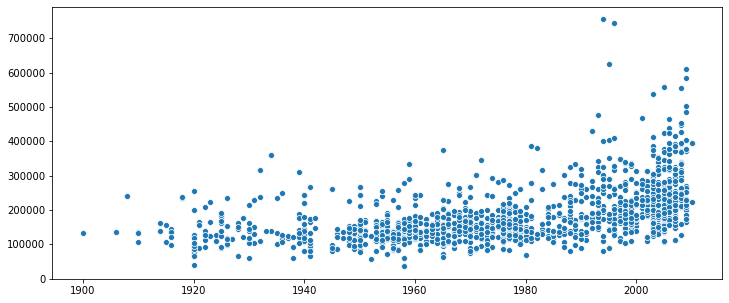

In [27]:
housescoef = houses[["GarageYrBlt","SalePrice"]].dropna()
X = housescoef.GarageYrBlt.values
Y = housescoef.SalePrice.values
print("Coeficiente de correlación lineal:",round(np.corrcoef(X,Y)[0,1],4))
fig, ax = plt.subplots(figsize = [12,5])
sns.scatterplot(x = X, y = Y)

In [28]:
houses.drop(columns = "GarageYrBlt", inplace = True)

Análisis columnas con NaNs como ausencia de la propiedad, categóricas y nomináles
---

#### Alley, GarageType, GarageFinish y MiscFeature 
La ausencia de valor en las siguientes columnas denotan : 
1. __Alley__ : "No alley acess".
2. __GarageType__ : "No garage".
3. __GarageFinish__ : "No garage".
4. __MiscFeature__ : "None".

Por lo tanto, a estas columnas las llenare con "Ausencia".

In [29]:
houses[["Alley","GarageType","GarageFinish","MiscFeature"]] = houses[["Alley","GarageType","GarageFinish","MiscFeature"]].fillna("ausencia")

Análsis columnas con NaNs como ausencia de la propiedad o el más bajo nivel, categóricas y ordinales
---

### BsmtQual, BsmtExposure, BsmtFinType1, BasmtFinType2, GarageQual, GarageCond, Fence
La ausencia de valor en las siguientes columnas denotan: 

1. __BsmtQual__ : "No basement".          
2. __BsmtExposure__ : "No basement".      
3. __BsmtFinType1__ : "No basement".      
4. __BsmtFinType2__ : "No basement".      
5. __GarageQual__ : "No Garage".        
6. __GarageCond__ : "No Garage".        
7. __Fence__ : "No Fence".
8. __FirePlaceQu__ : "No Fireplace".

Por lo tanto, a estas columnas las llenare con "No hay".

In [30]:
houses[["BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageQual", "GarageCond", "Fence","FireplaceQu"]] = houses[["BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageQual", "GarageCond", "Fence","FireplaceQu"]].fillna("No hay")

Data Wrangling / Feature Engineering
---

### Tipo de dato

In [31]:
houses.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


### Variables clasificadas.
__Numericas Nominales__:

"LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","Bedroom","Kitchen","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","ScreenPorch","MoSold","YrSold","BsmtUnfSF"

__Numericas Ordinales__:

"OverallQual","OverallCond"

__Categoricas nominales__:

"MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","BsmtExposure","Heating","CentralAir","Electrical","Functional","GarageType","GarageFinish","PavedDrive","Fence","MiscFeature","SaleType","SaleCondition"
 
__Categoritcas Ordinales__:

"ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond"

### Numéricas Nominales

In [32]:
Num_Nom = houses[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","ScreenPorch","MoSold","YrSold","BsmtUnfSF"]];Num_Nom.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,BsmtUnfSF
0,65.0,8450,2003,2003,196.0,706,0,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,2,2008,150
1,80.0,9600,1976,1976,0.0,978,0,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,5,2007,284
2,68.0,11250,2001,2002,162.0,486,0,920,920,866,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,9,2008,434
3,60.0,9550,1915,1970,0.0,216,0,756,961,756,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,2,2006,540
4,84.0,14260,2000,2000,350.0,655,0,1145,1145,1053,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,12,2008,490


### Numéricas Ordinales:

In [33]:
Num_Ordi = houses[["OverallQual","OverallCond"]]; Num_Ordi.head()

,OverallQual,OverallCond
0,7,5
1,6,8
2,7,5
3,7,5
4,8,5


#### Categóricas Nominales
Este tipo de variables necesitan ser procesadas con __getdummies__.

In [34]:
Cat_Nom = houses[["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","BsmtExposure","Heating","CentralAir","Electrical","Functional","GarageType","GarageFinish","PavedDrive","Fence","MiscFeature","SaleType","SaleCondition"]]; Cat_Nom.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,ausencia,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No hay,ausencia,WD,Normal
1,20,RL,Pave,ausencia,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,Gd,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No hay,ausencia,WD,Normal
2,60,RL,Pave,ausencia,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No hay,ausencia,WD,Normal
3,70,RL,Pave,ausencia,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,No,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,No hay,ausencia,WD,Abnorml
4,60,RL,Pave,ausencia,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,No hay,ausencia,WD,Normal


In [35]:
dum_Cat_Nom = pd.get_dummies(Cat_Nom, drop_first = True); dum_Cat_Nom.head()

,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_ausencia,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No hay,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_ausencia,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_ausencia,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No hay,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_ausencia,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,0

#### Categóricas Ordinales
Este tipo de variables necesitan ser procesadas con __OdinalEncoder__.

In [36]:
Cat_Ordi = houses[["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond"]]; Cat_Ordi.tail()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
1455,TA,TA,Gd,TA,Unf,Unf,Ex,TA,TA,TA,TA
1456,TA,TA,Gd,TA,ALQ,Rec,TA,TA,TA,TA,TA
1457,Ex,Gd,TA,Gd,GLQ,Unf,Ex,Gd,Gd,TA,TA
1458,TA,TA,TA,TA,GLQ,Rec,Gd,Gd,No hay,TA,TA
1459,Gd,TA,TA,TA,BLQ,LwQ,Gd,TA,No hay,TA,TA


Hare 6 ordenamientos de categorías y las aplicaré una por una. 

In [37]:
for x in Cat_Ordi.columns:
    print(Cat_Ordi[x].unique())

['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Po' 'Ex']
['Gd' 'TA' 'Ex' 'No hay' 'Fa']
['TA' 'Gd' 'Fa' 'Po']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No hay' 'LwQ']
['Unf' 'BLQ' 'No hay' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Ex' 'Gd' 'TA' 'Fa' 'Po']
['Gd' 'TA' 'Ex' 'Fa']
['No hay' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['TA' 'Fa' 'Gd' 'No hay' 'Ex' 'Po']
['TA' 'Fa' 'No hay' 'Gd' 'Po' 'Ex']


In [38]:
enc1 = OrdinalEncoder(categories = [["No hay","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],["No hay","Unf","LwQ","Rec","BLQ","ALQ","GLQ"]])
Cat_Ordi[["BsmtFinType1","BsmtFinType2"]] = enc1.fit_transform(houses.loc[:,["BsmtFinType1","BsmtFinType2"]])

In [39]:
enc2 = OrdinalEncoder(categories = [["No hay","Po","Fa","TA","Gd","Ex"],["No hay","Po","Fa","TA","Gd","Ex"],["No hay","Po","Fa","TA","Gd","Ex"],])
Cat_Ordi[["FireplaceQu","GarageQual","GarageCond"]] = enc2.fit_transform(houses.loc[:,["FireplaceQu","GarageQual","GarageCond"]])

In [40]:
enc3 = OrdinalEncoder(categories = [["No hay","Fa","TA","Gd","Ex"]])
Cat_Ordi["BsmtQual"] = enc3.fit_transform(houses.loc[:,["BsmtQual"]]).astype("int64")

In [41]:
enc4 = OrdinalEncoder(categories = [["Po","Fa","TA","Gd","Ex"],["Po","Fa","TA","Gd","Ex"]])
Cat_Ordi[["ExterCond","HeatingQC"]] = enc4.fit_transform(houses.loc[:,["ExterCond","HeatingQC"]]).astype("int64")

In [42]:
enc5 = OrdinalEncoder(categories = [["Fa","TA","Gd","Ex"],["Fa","TA","Gd","Ex"]])
Cat_Ordi[["ExterQual","KitchenQual"]] = enc5.fit_transform(houses.loc[:,["ExterQual","KitchenQual"]]).astype("int64")

In [43]:
enc6 = OrdinalEncoder(categories = [["Po","Fa","TA","Gd"]])
Cat_Ordi["BsmtCond"] = enc6.fit_transform(houses.loc[:,["BsmtCond"]]).astype("int64")

### DataFrame Final

In [44]:
Final = pd.concat([Num_Nom,Num_Ordi,dum_Cat_Nom,Cat_Ordi],axis = 1);Final

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,BsmtUnfSF,OverallQual,OverallCond,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_ausencia,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No hay,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_ausencia,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_ausencia,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No hay,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_ausencia,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,65.0,8450,2003,2003,196.0,706,0,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,2,2008,150,7,5,60,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2,2,3,2,6,1,4,2,0,3,3
1,80.0,9600,1976,1976,0.0,978,0,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,5,2007,284,6,8,20,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0

Construir el modelo
---

In [45]:
X = Final
Y = houses.SalePrice
la = LassoCV(alphas = None, cv = 10, max_iter =100000, normalize = True)
la.fit(X,Y)

LassoCV(cv=10, max_iter=100000, normalize=True)

### Coeficientes

In [46]:
coeficientes = pd.Series(la.coef_, index = Final.columns) ; 
coeficientes[coeficientes != 0]

LotArea                      0.262778
YearBuilt                   72.904323
YearRemodAdd                29.112534
MasVnrArea                  16.230625
BsmtFinSF1                   6.502758
1stFlrSF                     0.563645
GrLivArea                   46.227394
BsmtFullBath              3641.591192
FullBath                  2208.002513
BedroomAbvGr              -107.749671
KitchenAbvGr             -1215.296098
TotRmsAbvGrd               821.152983
Fireplaces                3682.013863
GarageCars                8197.003744
GarageArea                   2.681857
WoodDeckSF                   9.516118
ScreenPorch                 20.898916
MoSold                     -13.414479
OverallQual              10509.398812
OverallCond               2851.704379
MSSubClass                -192.407788
MSZoning_RM              -3561.884992
LotShape_IR2              3030.731923
LotShape_IR3            -16542.552834
LandContour_HLS           1658.700776
Utilities_NoSeWa         -6863.908219
LotConfig_Cu

Datos de Testing
---

In [86]:
test = pd.read_csv("Houses_test.csv");test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

### Numericas Nominales

In [48]:
Num_Nom_test = test[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","ScreenPorch","MoSold","YrSold","BsmtUnfSF"]];Num_Nom_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,BsmtUnfSF
0,80.0,11622,1961,1961,0.0,468.0,144.0,882.0,896,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,120,6,2010,270.0
1,81.0,14267,1958,1958,108.0,923.0,0.0,1329.0,1329,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,6,2010,406.0
2,74.0,13830,1997,1998,0.0,791.0,0.0,928.0,928,701,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,3,2010,137.0
3,78.0,9978,1998,1998,20.0,602.0,0.0,926.0,926,678,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,6,2010,324.0
4,43.0,5005,1992,1992,0.0,263.0,0.0,1280.0,1280,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,144,1,2010,1017.0


In [49]:
Num_Nom_test.isna().sum().where(lambda x: x != 0).dropna()

LotFrontage     227.0
MasVnrArea       15.0
BsmtFinSF1        1.0
BsmtFinSF2        1.0
TotalBsmtSF       1.0
BsmtFullBath      2.0
BsmtHalfBath      2.0
GarageCars        1.0
GarageArea        1.0
BsmtUnfSF         1.0
dtype: float64

In [50]:
Num_Nom_test[Num_Nom_test.isna().sum().where(lambda x: x != 0).dropna().index].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0
BsmtFinSF2,1458.0,52.619342,176.753926,0.0,0.00,0.0,0.00,1526.0
TotalBsmtSF,1458.0,1046.117970,442.898624,0.0,784.00,988.0,1305.00,5095.0
BsmtFullBath,1457.0,0.434454,0.530648,0.0,0.00,0.0,1.00,3.0
BsmtHalfBath,1457.0,0.065202,0.252468,0.0,0.00,0.0,0.00,2.0
GarageCars,1458.0,1.766118,0.775945,0.0,1.00,2.0,2.00,5.0
GarageArea,1458.0,472.768861,217.048611,0.0,318.00,480.0,576.00,1488.0
BsmtUnfSF,1458.0,554.294925,437.260486,0.0,219.25,460.0,797.75,2140.0


In [51]:
Num_Nom_test[["MasVnrArea","BsmtFinSF2","BsmtFullBath","BsmtHalfBath","GarageCars"]] = Num_Nom_test[["MasVnrArea","BsmtFinSF2","BsmtFullBath","BsmtHalfBath","GarageCars"]].fillna(0)
Num_Nom_test.fillna({"LotFrontage": Num_Nom_test.LotFrontage.mean(),"BsmtFinSF1": Num_Nom_test.BsmtFinSF1.mean(),"TotalBsmtSF":Num_Nom_test.TotalBsmtSF.mean(),"GarageArea":Num_Nom_test.GarageArea.mean(),"BsmtUnfSF":Num_Nom_test.BsmtUnfSF.mean()}, inplace = True)

### Numericas Ordinales

In [52]:
Num_Ordi_test = test[["OverallQual","OverallCond"]]; Num_Ordi_test.head() 

,OverallQual,OverallCond
0,5,6
1,6,6
2,5,5
3,6,6
4,8,5


### Categoricas Nominales

In [53]:
Cat_Nom_test = test[["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","BsmtExposure","Heating","CentralAir","Electrical","Functional","GarageType","GarageFinish","PavedDrive","Fence","MiscFeature","SaleType","SaleCondition"]]; Cat_Nom_test.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,20,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,No,GasA,Y,SBrkr,Typ,Attchd,Unf,Y,MnPrv,NaN,WD,Normal
1,20,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,No,GasA,Y,SBrkr,Typ,Attchd,Unf,Y,NaN,Gar2,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,No,GasA,Y,SBrkr,Typ,Attchd,Fin,Y,MnPrv,NaN,WD,Normal
3,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GasA,Y,SBrkr,Typ,Attchd,Fin,Y,NaN,NaN,WD,Normal
4,120,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,PConc,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,WD,Normal


In [76]:
Cat_Nom_test.isna().sum().where(lambda x: x != 0).dropna()

Series([], dtype: float64)

In [55]:
Cat_Nom_test[["Alley","MasVnrType","BsmtExposure","GarageType","GarageFinish","Fence","MiscFeature"]] = Cat_Nom_test[["Alley","MasVnrType","BsmtExposure","GarageType","GarageFinish","Fence","MiscFeature"]].fillna("ausencia")

In [75]:
for var in ["MSZoning","Utilities","Exterior1st","Exterior2nd","Functional","SaleType"]:
    Cat_Nom_test[var] = Cat_Nom_test[var].fillna(Cat_Nom_test[var].mode()[0])

In [77]:
Cat_Nom_test

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,20,RH,Pave,ausencia,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,No,GasA,Y,SBrkr,Typ,Attchd,Unf,Y,MnPrv,ausencia,WD,Normal
1,20,RL,Pave,ausencia,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,No,GasA,Y,SBrkr,Typ,Attchd,Unf,Y,ausencia,Gar2,WD,Normal
2,60,RL,Pave,ausencia,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,No,GasA,Y,SBrkr,Typ,Attchd,Fin,Y,MnPrv,ausencia,WD,Normal
3,60,RL,Pave,ausencia,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GasA,Y,SBrkr,Typ,Attchd,Fin,Y,ausencia,ausencia,WD,Normal
4,120,RL,Pave,ausencia,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,PConc,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,ausencia,ausencia,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,Pave,ausencia,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,CBlock,No,GasA,Y,SBrkr,Typ,ausencia,ausencia,Y,ausencia,ausencia,WD,Normal
1455,160,RM,Pave,ausencia,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,CBlock,No,GasA,Y,SBrkr,Typ,CarPort,Unf,Y,ausencia,ausencia,WD,Abnorml
1456,20,RL,Pave,ausencia,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,No,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,ausencia,ausencia,WD,Abnorml
1457,85,RL,Pave,ausencia,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,PConc,Av,GasA,Y,SBrkr,Typ,ausencia,ausencia,Y,MnPrv,Shed,WD,Normal


In [78]:
dum_Cat_Nom_test = pd.get_dummies(Cat_Nom_test, drop_first = True); dum_Cat_Nom_test.head()

,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_ausencia,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_ausencia,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_ausencia,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_ausencia,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_ausencia,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_ausencia,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_ausencia,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,120,0,0,1,0,1

### Categoricas Ordinales

In [56]:
Cat_Ordi_test = test[["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond"]]; Cat_Ordi_test.tail()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
1454,TA,TA,TA,TA,Unf,Unf,Gd,TA,NaN,NaN,NaN
1455,TA,TA,TA,TA,Rec,Unf,TA,TA,NaN,TA,TA
1456,TA,TA,TA,TA,ALQ,Unf,Ex,TA,TA,TA,TA
1457,TA,TA,Gd,TA,GLQ,Unf,TA,TA,NaN,NaN,NaN
1458,TA,TA,Gd,TA,LwQ,Unf,Ex,TA,TA,TA,TA


In [57]:
Cat_Ordi_test.isna().sum().where(lambda x: x != 0).dropna()

BsmtQual         44.0
BsmtCond         45.0
BsmtFinType1     42.0
BsmtFinType2     42.0
KitchenQual       1.0
FireplaceQu     730.0
GarageQual       78.0
GarageCond       78.0
dtype: float64

In [58]:
Cat_Ordi_test[["BsmtQual","BsmtCond","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageQual","GarageCond"]] = Cat_Ordi_test[["BsmtQual","BsmtCond","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageQual","GarageCond"]].fillna("No hay")

In [59]:
Cat_Ordi_test["KitchenQual"] = Cat_Ordi_test["KitchenQual"].fillna("TA")

In [60]:
for x in ["ExterQual","KitchenQual"]:
    print(x)
    print(Cat_Ordi_test[x].unique())

ExterQual
['TA' 'Gd' 'Ex' 'Fa']
KitchenQual
['TA' 'Gd' 'Ex' 'Fa']


In [61]:
enc11 = OrdinalEncoder(categories = [["No hay","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],["No hay","Unf","LwQ","Rec","BLQ","ALQ","GLQ"]])
Cat_Ordi_test[["BsmtFinType1","BsmtFinType2"]] = enc11.fit_transform(Cat_Ordi_test.loc[:,["BsmtFinType1","BsmtFinType2"]])

In [62]:
enc12 = OrdinalEncoder(categories = [["No hay","Po","Fa","TA","Gd","Ex"],["No hay","Po","Fa","TA","Gd","Ex"]])
Cat_Ordi_test[["FireplaceQu","GarageCond"]] = enc12.fit_transform(Cat_Ordi_test.loc[:,["FireplaceQu","GarageCond"]])

In [63]:
enc13 = OrdinalEncoder(categories = [["No hay","Po","Fa","TA","Gd"],["No hay","Po","Fa","TA","Gd"]])
Cat_Ordi_test[["BsmtCond","GarageQual"]] = enc13.fit_transform(Cat_Ordi_test.loc[:,["BsmtCond","GarageQual"]])

In [64]:
enc14 = OrdinalEncoder(categories = [["No hay","Fa","TA","Gd","Ex"]])
Cat_Ordi_test["BsmtQual"] = enc14.fit_transform(Cat_Ordi_test.loc[:,["BsmtQual"]]).astype("int64")

In [65]:
enc15 = OrdinalEncoder(categories = [["Po","Fa","TA","Gd","Ex"],["Po","Fa","TA","Gd","Ex"]])
Cat_Ordi_test[["ExterCond","HeatingQC"]] = enc15.fit_transform(Cat_Ordi_test.loc[:,["ExterCond","HeatingQC"]]).astype("int64")

In [66]:
enc16 = OrdinalEncoder(categories = [["Fa","TA","Gd","Ex"],["Fa","TA","Gd","Ex"]])
Cat_Ordi_test[["ExterQual","KitchenQual"]] = enc16.fit_transform(Cat_Ordi_test.loc[:,["ExterQual","KitchenQual"]]).astype("int64")

In [67]:
Cat_Ordi_test

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,1,2,2,3,3,2,2,1,0,3,3
1,1,2,2,3,5,1,2,2,0,3,3
2,1,2,3,3,6,1,3,1,3,3,3
3,1,2,2,3,6,1,4,2,4,3,3
4,2,2,3,3,5,1,4,2,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...
1454,1,2,2,3,1,1,3,1,0,0,0
1455,1,2,2,3,3,1,2,1,0,3,3
1456,1,2,2,3,5,1,4,1,3,3,3
1457,1,2,3,3,6,1,2,1,0,0,0


### Final test

In [79]:
Final_test = pd.concat([Num_Nom_test,Num_Ordi_test,dum_Cat_Nom_test,Cat_Ordi_test],axis = 1); Final_test

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,BsmtUnfSF,OverallQual,OverallCond,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_ausencia,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_ausencia,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_ausencia,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_ausencia,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_ausencia,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_ausencia,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_ausencia,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,80.0,11622,1961,1961,0.0,468.0,144.0,882.0,896,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,120,6,2010,270.0,5,6,20,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,2,3,3,2,2,1,0,3,3
1,81.0,14267,1958,1958,108.0,923.0,0.0,1329.0,1329,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,6,2010,406.0,6,6,20,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,

In [80]:
Final

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,BsmtUnfSF,OverallQual,OverallCond,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_ausencia,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No hay,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_ausencia,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_ausencia,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No hay,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_ausencia,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,65.0,8450,2003,2003,196.0,706,0,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,2,2008,150,7,5,60,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2,2,3,2,6,1,4,2,0,3,3
1,80.0,9600,1976,1976,0.0,978,0,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,5,2007,284,6,8,20,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0

Predicciones
---

In [84]:
y_pred = la.predict(Final)

In [94]:
y_pred

array([209598.47785107, 193432.7557985 , 220371.74883736, ...,
       259246.85219094, 145009.78739195, 147429.74736334])

Archivo para Kaggle
---

In [100]:
submit=pd.DataFrame([test["Id"].astype("int64"),y_pred])
submit.T
submit.T.to_csv('sample_submission.csv',index=False)